## Lecture 11 Example

**Nested ANOVA: analysis of hierarchical design experiments**

The nested two-way ANOVA model: $y_{ijk} = \mu + \alpha_i + \beta_{j(i)} + \epsilon_{ijk}$

---

### Example

A large manufacturing company operates three regional training schools for mechanics, one in each of its operating districts. The schools have two instructors each, who teach classes of about 15 mechanics in three-week sessions. 

The company was concerned about the effect of school (group) and instructor (block) on the learning achieved. To investigate these effects, classes in each district were formed in the usual way and then randomly assigned to one of the two instructors in the school. This was done for two sessions, and at the end of each session a suitable summary measure of learning for the class was obtained. The results are presented below:

In [1]:
data = data.frame(instructor = c("1","1","2","2"), 
                  Leeds      = c(25, 29, 14, 11),
                  Machester  = c(11,  6, 22, 18),
                  Liverpool  = c(17, 20,  5,  2)
                 )
data

instructor,Leeds,Machester,Liverpool
<chr>,<dbl>,<dbl>,<dbl>
1,25,11,17
1,29,6,20
2,14,22,5
2,11,18,2


Help the manufacturing company to investigate whether there is a significant differences in learning between the different schools and instructors within the schools.

---

**1.1.** Visually inspect the data.

In [2]:
# data analysis
a = 3        # 3 groups
b = 2        # 2 blocks within each group
n = 2        # 2 trials per block withing each group
N = a*b*n    # 12 trials overall
N

[1] 12

In [3]:
# restructure data
df = cbind(stack(data[,2:4]), as.factor(rep(data[,1],a)))
colnames(df) = c("learning","school","instructor")
df

learning,school,instructor
<dbl>,<fct>,<fct>
25,Leeds,1
29,Leeds,1
14,Leeds,2
11,Leeds,2
11,Machester,1
6,Machester,1
22,Machester,2
18,Machester,2
17,Liverpool,1


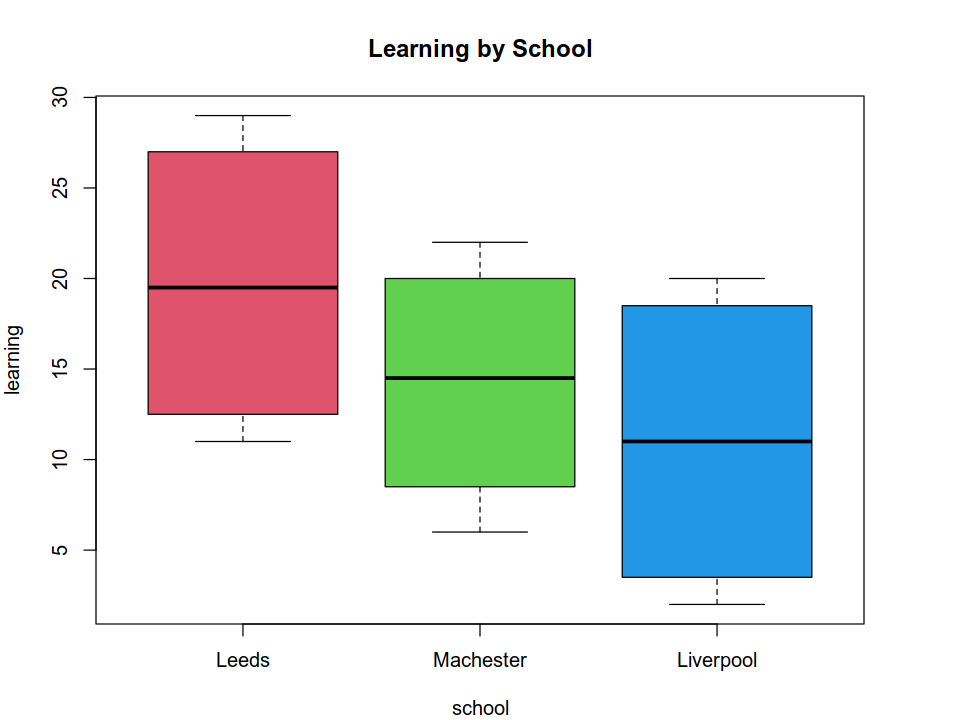

In [4]:
# draw a boxplot to inspect group and block means
options(repr.plot.width=8, repr.plot.height=6)
par(mar=c(4,4,4,4), mfrow=c(1,1))
boxplot(learning~school, main="Learning by School", col=c(2,3,4), data=df)

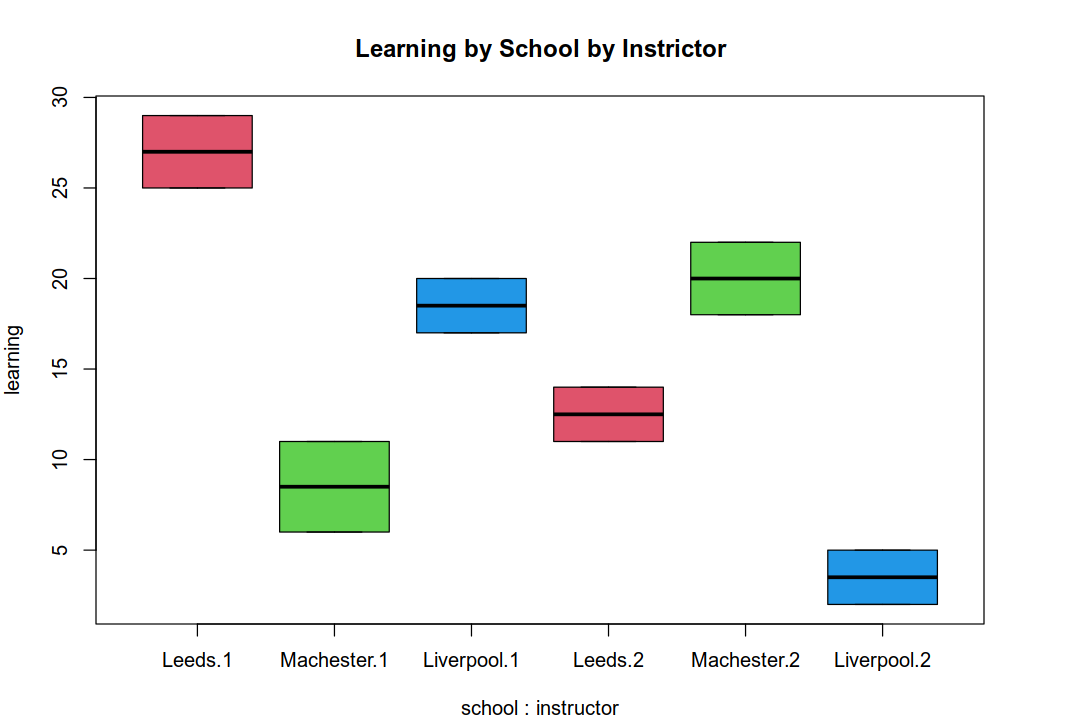

In [5]:
options(repr.plot.width=9, repr.plot.height=6)
par(mar=c(4,4,4,4), mfrow=c(1,1))
boxplot(learning~school/instructor, 
        main="Learning by School by Instrictor", col=c(2,3,4,2,3,4), data=df)

**Conclusions:**

- The Leeds school leads in the overall learning outcome, however this may be due to a chance alone.
- There are significant differences in learning outcomes between the classes taught by different instructors.

---

**1.2.** Carry out a nested two-way ANOVA to test the hypothesis, with a 95% confidence level, that all schools and all instructors have the same effect on learning, that is

$$
H^{A}_0 : \text{ all } \alpha_i = 0 \quad\text{vs.}\quad H^{A}_1 : \text{ at least one } \alpha_i \ne 0
$$

and

$$
H^{B(A)}_0 : \text{ all } \beta_{j(i)} = 0 \quad\text{vs.}\quad H^{B(A)}_1 : \text{ at least one } \beta_{j(i)} \ne 0
$$


You need to construct an analysis of variance table and compute the test statistic. You will need to use the formullas below:

$$
SS_T = \sum_{i=1}^a  \sum_{j=1}^b \sum_{k=1}^n y_{ijk}^2 - N \bar y_{\bullet\bullet\bullet}^2 \qquad
SS_A = bn \sum_{i=1}^a \bar y_{i\bullet\bullet}^2 - N \bar y_{\bullet\bullet\bullet}^2 \qquad
SS_{B(A)} = n \sum_{i=1}^a \sum_{j=1}^b \bar y_{ij\bullet}^2 - bn \sum_{i=1}^a \bar y_{i\bullet\bullet}^2 \qquad
SS_E = \sum_{i=1}^a  \sum_{j=1}^b \sum_{k=1}^n y_{ijk}^2 - n \sum_{i=1}^a \sum_{j=1}^b \bar y_{ij\bullet}^2
$$

$$
MS_A = \frac{SS_A}{a-1} \qquad
MS_{B(A)} = \frac{SS_{B(A)}}{a(b-1)} \qquad
MS_{E} = \frac{SS_E}{ab(n-1)}
$$

and

$$
F_A =\frac{MS_A}{MS_E} \sim F_{a-1,\,ab(n-1)} \quad
F_{B(A)} =\frac{MS_{B(A)}}{MS_E} \sim F_{a(b-1),\,ab(n-1)} 
$$

where $a$ is the number of treatment groups, $b$ is the number of blocks nested withing each group, $n$ is the number of trials per each block, and $N = abn$ is the total number of trials.

In [6]:
SST  = with(df, sum(learning^2) - N*mean(learning)^2 )
SSA  = with(df, b*n*sum( tapply(learning,school,mean)^2 ) - N*mean(learning)^2 )
SSBA = with(df, n*sum( tapply(learning,list(school,instructor),mean)^2 ) 
                                    - b*n*sum( tapply(learning,school,mean)^2 ) )
SSE  = with(df, sum(learning^2) - n*sum( tapply(learning,list(school,instructor),mean)^2 ) )

SST-SSA-SSBA-SSE # sanity check 

MSA  = SSA/(a-1)
MSBA = SSBA/(a*(b-1))
MSE  = SSE/(a*b*(n-1))

FA   = MSA/MSE
FBA  = MSBA/MSE

PA   = 1-pf(FA,a-1,a*b*(n-1))
PBA  = 1-pf(FBA,a*(b-1),a*b*(n-1))

[1] 0

In [7]:
table = data.frame(row.names=c("Between groups", "Between nested blocks", "Residual", "Total"), 
                   dof=c(a-1,a*(b-1),a*b*(n-1),N-1),
                   SS=c(SSA,SSBA,SSE,SST),
                   MS=c(MSA,MSBA,MSE,NA),
                   F=c(FA,FBA,NA,NA),
                   P=c(PA,PBA,NA,NA)
                  )
round(table, 4)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Between groups,2,156.5,78.2500,11.1786,0.0095
Between nested blocks,3,567.5,189.1667,27.0238,0.0007
Residual,6,42.0,7.0000,NA,NA
Total,11,766.0,NA,NA,NA


We now repeat the same analysis using built-in statistical functions:

In [8]:
model = aov(learning~school/instructor, data=df)
round(anova(model),4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
school,2,156.5,78.2500,11.1786,0.0095
school:instructor,3,567.5,189.1667,27.0238,0.0007
Residuals,6,42.0,7.0000,NA,NA


**Conclusions:** 

- $P_A = 0.95\%$, thus we reject the null hypothesis that all schools have the same effect on learning.
- $P_{B(A)} = 0.07\%$, thus we reject the null hypothesis that all instructors in all schools have the same effect on learning.


---

**1.3.** Conduct residual analysis. Comment on the plots.

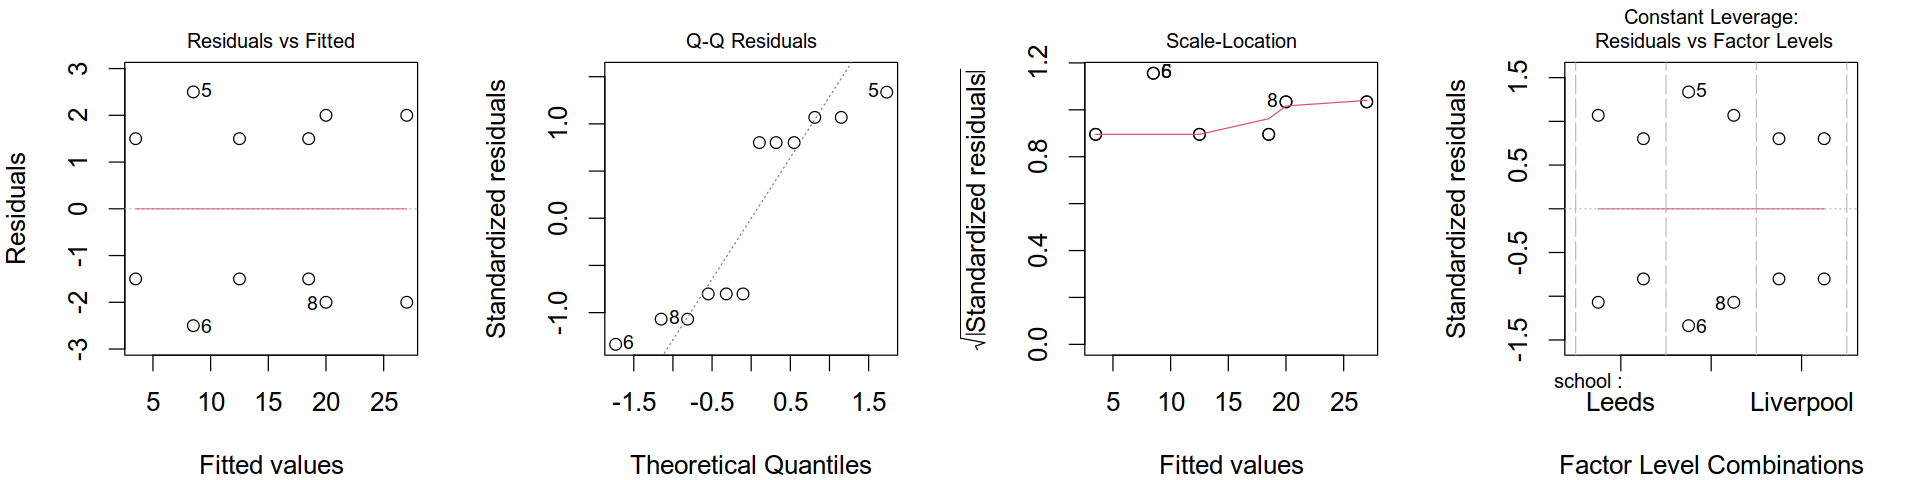

In [9]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(4,4,2,2), cex=1.3)
plot(model)

---